# Sobol Indices

It is required to first build a POD object based on the Kriging metamodel or on the polynomial chaos in order to compute the Sobol indices. It also can be used only if the input parameters dimension is greater than 2 (without counting the defect).

In [1]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
#try:
#    %matplotlib inline
#except:
#    pass

## Generate data

In [2]:
inputSample = ot.Sample(
    [[4.59626812e+00, 7.46143339e-02, 1.02231538e+00, 8.60042277e+01],
    [4.14315790e+00, 4.20801346e-02, 1.05874908e+00, 2.65757364e+01],
    [4.76735111e+00, 3.72414824e-02, 1.05730385e+00, 5.76058433e+01],
    [4.82811977e+00, 2.49997658e-02, 1.06954641e+00, 2.54461380e+01],
    [4.48961094e+00, 3.74562922e-02, 1.04943946e+00, 6.19483646e+00],
    [5.05605334e+00, 4.87599783e-02, 1.06520409e+00, 3.39024904e+00],
    [5.69679328e+00, 7.74915877e-02, 1.04099514e+00, 6.50990466e+01],
    [5.10193991e+00, 4.35520544e-02, 1.02502536e+00, 5.51492592e+01],
    [4.04791970e+00, 2.38565932e-02, 1.01906882e+00, 2.07875350e+01],
    [4.66238956e+00, 5.49901237e-02, 1.02427200e+00, 1.45661275e+01],
    [4.86634219e+00, 6.04693570e-02, 1.08199374e+00, 1.05104730e+00],
    [4.13519347e+00, 4.45225831e-02, 1.01900124e+00, 5.10117047e+01],
    [4.92541940e+00, 7.87692335e-02, 9.91868726e-01, 8.32302238e+01],
    [4.70722074e+00, 6.51799251e-02, 1.10608515e+00, 3.30181002e+01],
    [4.29040932e+00, 1.75426222e-02, 9.75678838e-01, 2.28186756e+01],
    [4.89291400e+00, 2.34997929e-02, 1.07669835e+00, 5.38926138e+01],
    [4.44653744e+00, 7.63175936e-02, 1.06979154e+00, 5.19109415e+01],
    [3.99977452e+00, 5.80430585e-02, 1.01850716e+00, 7.61988190e+01],
    [3.95491570e+00, 1.09302814e-02, 1.03687664e+00, 6.09981789e+01],
    [5.16424368e+00, 2.69026464e-02, 1.06673711e+00, 2.88708887e+01],
    [5.30491620e+00, 4.53802273e-02, 1.06254792e+00, 3.03856837e+01],
    [4.92809155e+00, 1.20616369e-02, 1.00700410e+00, 7.02512744e+00],
    [4.68373805e+00, 6.26028935e-02, 1.05152117e+00, 4.81271603e+01],
    [5.32381954e+00, 4.33013582e-02, 9.90522007e-01, 6.56015973e+01],
    [4.35455857e+00, 1.23814619e-02, 1.01810539e+00, 1.10769534e+01]])

signals = ot.Sample(
    [[ 37.305445], [ 35.466919], [ 43.187991], [ 45.305165], [ 40.121222], [ 44.609524],
     [ 45.14552 ], [ 44.80595 ], [ 35.414039], [ 39.851778], [ 42.046049], [ 34.73469 ],
     [ 39.339349], [ 40.384559], [ 38.718623], [ 46.189709], [ 36.155737], [ 31.768369],
     [ 35.384313], [ 47.914584], [ 46.758537], [ 46.564428], [ 39.698493], [ 45.636588],
     [ 40.643948]])

In [3]:
# signal detection threshold
detection = 38.

## Build POD with Kriging model
### Running the Kriging based POD

In [4]:
krigingPOD = otpod.KrigingPOD(inputSample, signals, detection)

# we can change all simulation size parameters as we are not interested in having an accurate POD curve
krigingPOD.setSamplingSize(200) 
krigingPOD.setSimulationSize(50)
krigingPOD.run()

Start optimizing covariance model parameters...
Kriging optimizer completed
kriging validation Q2 (>0.9): 1.0000
Computing POD per defect: [==================================================] 100.00% Done


### Show POD graphs

/home/dumas/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


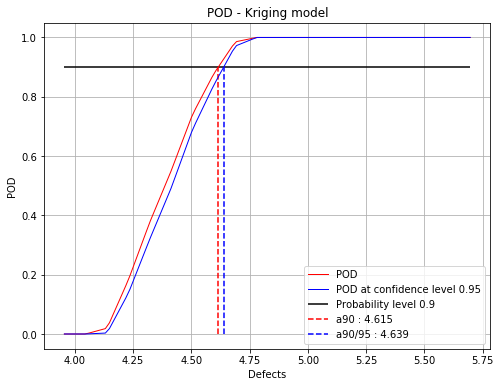

In [5]:
fig, ax = krigingPOD.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODKriging.png')
# The figure is saved in PODPolyChaos.png
fig.show()

## Build POD with polynomial chaos model
### Running the chaos based POD

In [6]:
chaosPOD = otpod.PolynomialChaosPOD(inputSample, signals, detection)

# we can change all simulation size parameters as we are not interested in having an accurate POD curve
chaosPOD.setSamplingSize(200)
chaosPOD.setSimulationSize(50)
chaosPOD.run()

Start build polynomial chaos model...
Polynomial chaos model completed
Polynomial chaos validation R2 (>0.8) : 0.9999
Polynomial chaos validation Q2 (>0.8) : 0.9987
Computing POD per defect: [==================================================] 100.00% Done


### Show POD graphs

/home/dumas/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


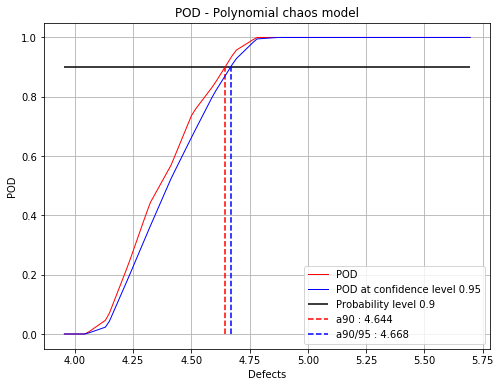

In [7]:
fig, ax = chaosPOD.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODChaos.png')
# The figure is saved in PODPolyChaos.png
fig.show()

## Run the sensitivity analysis

The sensitivity analysis can only be performed with POD computed with a kriging metamodel or a polynomial chaos.

The Sobol indices are aggregated indices computed for the defect sizes defined in the POD study.

## Using the kriging model

In [8]:
# number of simulations
N = 1000
sobol = otpod.SobolIndices(krigingPOD, N)
sobol.run()

  4.68833784]


### Draw the figure with given labels

The default labels are $Xi$ but the user can specify its own input labels. Besides, the figure can be saved specifying the attribute *name*.

In [9]:
label = ['X1', 'variable2', 'param3']

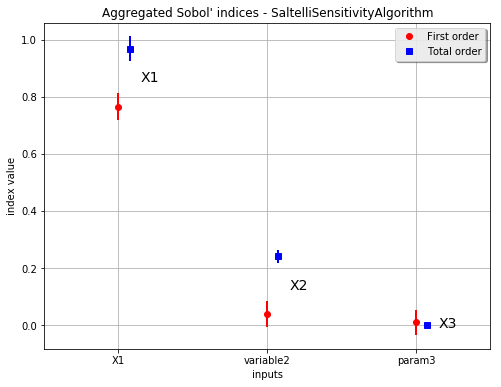

In [10]:
fig, ax = sobol.drawAggregatedIndices(label, name='figure/Sobol.png')

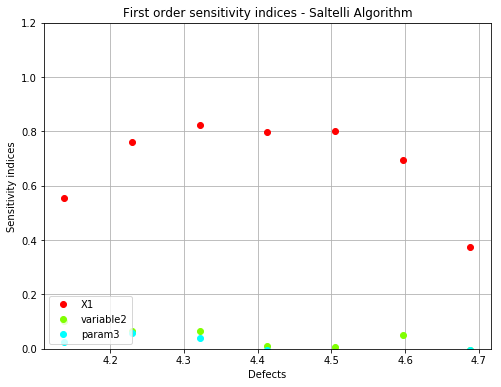

In [11]:
fig, ax = sobol.drawFirstOrderIndices(label, name='figure/FirstOrderSobol.png')

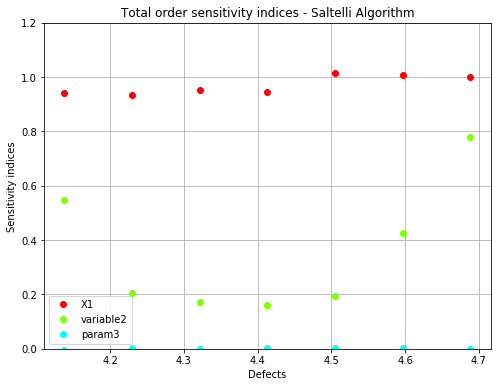

In [12]:
fig, ax = sobol.drawTotalOrderIndices(label, name='figure/TotalOrderSobol.png')

### Get the numerical results

The Sobol indices are given in the OpenTURNS object [SobolIndicesAlgorithm](http://doc.openturns.org/openturns-latest/sphinx/user_manual/_generated/openturns.SobolIndicesAlgorithm.html). The method *getSensitivityResult* allows the get this object and then get back all wanted results.

In [13]:
# get the OpenTURNS object
sobol_result = sobol.getSensitivityResult()

# get aggregated indices
print("Aggregated first order: {}".format(sobol_result.getAggregatedFirstOrderIndices()))
print("Aggregated total order: {}".format(sobol_result.getAggregatedTotalOrderIndices()))

# get the confidence interval
print('\nFirst order confidence interval:')
print(sobol_result.getFirstOrderIndicesInterval())
print('\nTotal order confidence interval:')
print(sobol_result.getTotalOrderIndicesInterval())

Aggregated first order: [0.765142,0.0389492,0.009437]
Aggregated total order: [0.967498,0.241669,0.00158793]

First order confidence interval:
[0.721425, 0.808858]
[-0.00216437, 0.0800628]
[-0.0309342, 0.0498082]

Total order confidence interval:
[0.927734, 1.00726]
[0.222134, 0.261204]
[-0.000178732, 0.0033546]


It is also possible to retreive the Sobol indices for one defect size among the list.

As example, we want the indices for the 4th defect size in the list. The list is updated taking into account that some defect sizes are removed because the variance of the ouput is null (see the warning above), this is the case when the POD is equal to 0 or 1.

In [14]:
print("Defect sizes: {}".format(sobol.getDefectSizes()))
# get indices for a specific defect sizes
i = 3 # correspond with the 4th value.
print("\nIndices for defect size {:.3f}: {}".format(sobol.getDefectSizes()[i], sobol_result.getFirstOrderIndices(i)))

Defect sizes: [ 4.13827123  4.229949    4.32162677  4.41330454  4.5049823   4.59666007
  4.68833784]

Indices for defect size 4.413: [0.797912,0.0111368,-0.00456263]


### Change the defect sizes list

It is possible to modify the list of the defect sizes either to reduce the range or to compute the indices for a specific defect value. If only one defect size is provided, then the aggregated indices correspond to the indices.

In [15]:
sobol.setDefectSizes([4.5])
sobol.run()

In [16]:
# get the OpenTURNS object
sobol_result = sobol.getSensitivityResult()
# get aggregated indices
print("Aggregated first order: {}".format(sobol_result.getAggregatedFirstOrderIndices()))
print("Aggregated total order: {}".format(sobol_result.getAggregatedTotalOrderIndices()))
# get indices
print("First order: {}".format(sobol_result.getFirstOrderIndices()))
print("Total order: {}".format(sobol_result.getTotalOrderIndices()))

Aggregated first order: [0.758827,-0.0190164,-0.0574944]
Aggregated total order: [1.00541,0.209723,0.00412599]
First order: [0.758827,-0.0190164,-0.0574944]
Total order: [1.00541,0.209723,0.00412599]


### Change the method to compute the indices

OpenTURNS implements 4 methods : Saltelli, Martinez, Jansen and Mauntz-Kucherenko. These methods can be chosen using the method *setSensitivityMethod*.

In [17]:
sobol.setSensitivityMethod("Martinez")
sobol.run()

In [18]:
# get the OpenTURNS object
sobol_result = sobol.getSensitivityResult()
# get aggregated indices
print("Aggregated first order: {}".format(sobol_result.getAggregatedFirstOrderIndices()))
print("Aggregated total order: {}".format(sobol_result.getAggregatedTotalOrderIndices()))

Aggregated first order: [0.817988,0.044531,0.0120991]
Aggregated total order: [1.00076,0.208898,0.000234818]


## Case with polynomial chaos

With polynomial chaos, the POD is computed simulating several polynomial chaos coefficients. Then it requires more times than with Kriging. The number of simulations is initially set to 1000 but it can be changed using the method *setSimulationSize*.

In [19]:
# number of simulations
N = 1000
sobol2 = otpod.SobolIndices(chaosPOD, N)
#sobol2.setSimulationSize(500)
sobol2.run()

  4.68833784  4.78001561]


In [20]:
# get the OpenTURNS object
sobol_result2 = sobol2.getSensitivityResult()

# get aggregated indices
print("Aggregated first order: {}".format(sobol_result2.getAggregatedFirstOrderIndices()))
print("Aggregated total order: {}".format(sobol_result2.getAggregatedTotalOrderIndices()))

# get the confidence interval
print('\nFirst order confidence interval:')
print(sobol_result2.getFirstOrderIndicesInterval())
print('\nTotal order confidence interval:')
print(sobol_result2.getTotalOrderIndicesInterval())

Aggregated first order: [0.755025,0.0233727,-0.00412462]
Aggregated total order: [0.992021,0.214846,0.0154186]

First order confidence interval:
[0.712503, 0.797546]
[-0.0175281, 0.0642735]
[-0.0436971, 0.0354478]

Total order confidence interval:
[0.952575, 1.03147]
[0.196013, 0.233679]
[0.010796, 0.0200413]


/home/dumas/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


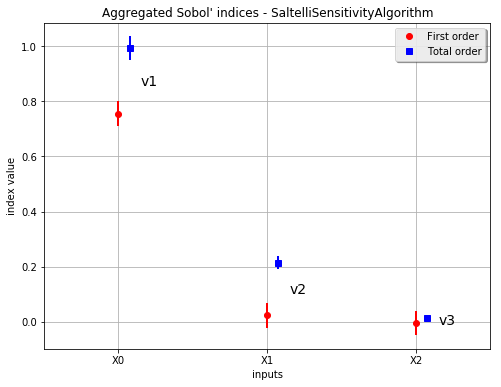

In [21]:
fig, ax = sobol2.drawAggregatedIndices()
fig.show()